In [6]:
function read_matrix(file_path)
    lines = eachline(file_path)
    (size, rest) = Iterators.peel(lines)

    (n, l) = split(size)
    
    n = parse(Int, n)

    mat = zeros(n,n)

    for line in rest
        (i, j, val) = split(line)
        i = parse(Int, i)   
        j = parse(Int, j)
        val = parse(Float64, val)
        mat[i,j] = val
    end

    return mat
end

function read_vector(file_path)
    lines = eachline(file_path)
    (size, rest) = Iterators.peel(lines)

    n = parse(Int, size)

    vec = zeros(n)

    i = 1
    for line in rest
        val = parse(Float64, line)
        vec[i] = val
        i += 1
    end

    return vec
end

function print_matrix(a)
    show(stdout, "text/plain", a)
    println()
end

print_matrix (generic function with 1 method)

In [7]:
mat = read_matrix("./Dane/Dane16_1_1/A.txt")

show(stdout, "text/plain", mat)

16×16 Matrix{Float64}:
  0.37517     1.36991   4.5534    -3.53688      0.00983523   0.0        0.0         0.0         0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
 -1.30281    -4.35903   0.871167   7.34207      0.0          0.175106   0.0         0.0         0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
  4.75774    -2.09952   1.7244    -1.67618      0.0          0.0        0.0159132   0.0         0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
  0.0535187   5.52435  -5.13303   -3.31049      0.0          0.0        0.0         0.284416    0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
  0.0         0.0       0.0        0.243349    -2.64842     -2.48366    3.27421    -0.188398    0.101303   0.0        0.0         0.0         0.0       0.0         0.0        0.0
  0.0         0.0       0.0        0.0522578   -6.74525      3.08946   -0.509293  

In [8]:
function LU!(a, n)
    # Kolejne kroki
    for k in 1:(n-1)
        # Zerowanie kolumny k dla każdego wiersza niżej
        for i in (k+1):n
            # Współczynnik l[i,k] 
            a[i,k] = a[i,k] / a[k,k]
            # Modyfikacja reszty wiersza
            for j in (k+1):n
                a[i,j] = a[i,j] - a[i,k] * a[k,j]
            end
        end
    end
    return a
end

function LUxb(a,n,b)
    x = zeros(n)
    
    # Rozwiązywanie Ly = b
    for k in 1:n
        x[k] = b[k]
        for i in 1:(k-1)
            x[k] -= x[i] * a[k,i]
        end
    end
    
    # Rozwiązywanie Ux = y
    for k in reverse(1:n)
        for i in (k+1):n
            x[k] -= x[i] * a[k,i]
        end
        x[k] /= a[k,k]
    end

    return x
end

function L(a, n)
    l = copy(a)
    for i in 1:n
        l[i,i] = 1.0
        for j in (i+1):n
            l[i,j] = 0.0
        end
    end
    return l
end

function U(a, n)
    u = copy(a)
    for j in 1:n
        for i in (j+1):n
            u[i,j] = 0.0
        end
    end
    return u
end

function pivotedLU!(a, n)
    # Pivot 
    p = [i for i in 1:n]

    # Kolejne kroki
    for k in 1:(n-1)
        # Znalezienie maksymalnego elementu w kolumnie k
        m = k
        for i in (k+1):n
            if abs(a[p[i],k]) > abs(a[p[m],k])
                m = i
            end
        end
        
        # Zamiana wiersza k z m
        (p[k], p[m]) = (p[m], p[k])

        # Zerowanie kolumny k dla każdego wiersza niżej
        for i in (k+1):n
            # Współczynnik l[i,k] 
            a[p[i],k] = a[p[i],k] / a[p[k],k]
            # Modyfikacja reszty wiersza
            for j in (k+1):n
                a[p[i],j] = a[p[i],j] - a[p[i],k] * a[p[k],j]
            end
        end
    end
    return (a,p)
end

function pivotedLUxb(a,n,b,p)
    x = zeros(n)
    
    # Rozwiązywanie Ly = b
    for k in 1:n
        x[k] = b[p[k]]
        for i in 1:(k-1)
            x[k] -= x[i] * a[p[k],i]
        end
    end
    
    # Rozwiązywanie Ux = y
    for k in reverse(1:n)
        for i in (k+1):n
            x[k] -= x[i] * a[p[k],i]
        end
        x[k] /= a[p[k],k]
    end

    return x
end

function permute(a, n, p)
    b = copy(a)
    for i in 1:n 
        b[i,:] = a[p[i],:]
    end
    # for i in 1:n 
    #     if p[i] < i
    #         (b[i,:], b[p[i],:]) = (b[p[i],:], b[i,:])
    #     end
    # end
    return b
end

function inv_permute(a, n, p)
    b = copy(a)
    for i in 1:n 
        b[p[i],:] = a[i,:]
    end
    # for i in 1:n 
    #     if p[i] < i
    #         (b[i,:], b[p[i],:]) = (b[p[i],:], b[i,:])
    #     end
    # end
    return b
end

inv_permute (generic function with 1 method)

In [9]:
mat = read_matrix("./Dane/Dane10000_1_1/A.txt")
n_max = 600
n_min = 50
k = 40
rang = range(n_min, n_max, step=50)

times = []
for n in rang
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed LU!(a,n)
        sum += t
    end
    push!(times, sum / k)
end

times_p = []
for n in rang
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed pivotedLU!(a,n)
        sum += t
    end
    push!(times_p, sum / k)
end

using Plots
plt = plot(rang, [times times_p], labels=["Bez wyboru" "Z wyborem"], ylabel="Czas [s]", xlabel="n")

savefig(plt, "./raport/plots/standard_comp_time.png")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_5/raport/plots/standard_comp_time.png"

In [10]:
mat = read_matrix("./Dane/Dane16_1_1/A.txt")
#mat = rand(16,16)
a = copy(mat)
n = 16
@time LU!(a, n)
print_matrix(mat)
print_matrix(a)

l = L(a, n)
u = U(a, n)
println(l * u ≈ mat)

b = read_vector("./Dane/Dane16_1_1/b.txt")
x = LUxb(a,n,b)
println(x ≈ ones(n))
println(x)

x_lib = mat \ b
println(x_lib ≈ ones(n))
println(x_lib)

  0.000010 seconds
16×16 Matrix{Float64}:
  0.37517     1.36991   4.5534    -3.53688      0.00983523   0.0        0.0         0.0         0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
 -1.30281    -4.35903   0.871167   7.34207      0.0          0.175106   0.0         0.0         0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
  4.75774    -2.09952   1.7244    -1.67618      0.0          0.0        0.0159132   0.0         0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
  0.0535187   5.52435  -5.13303   -3.31049      0.0          0.0        0.0         0.284416    0.0        0.0        0.0         0.0         0.0       0.0         0.0        0.0
  0.0         0.0       0.0        0.243349    -2.64842     -2.48366    3.27421    -0.188398    0.101303   0.0        0.0         0.0         0.0       0.0         0.0        0.0
  0.0         0.0       0.0        0.0522578   -6.74525      3.

0.0317963    3.06218    -2.34713     -0.934151    0.0774933    0.20671     0.0           0.0         0.0
  0.0         0.0         0.0          0.0          -0.0          0.0       -0.0          0.0486958   -0.0494738   1.92734      2.13657    -4.51431      0.0102267   0.0139636     0.0         0.0
  0.0         0.0         0.0          0.0          -0.0          0.0       -0.0          0.0174515    0.129676    4.22962    -14.3301     22.2124      -0.0700605  -0.0590606     0.145135    0.0
  0.0         0.0         0.0          0.0          -0.0          0.0       -0.0          0.00798739  -0.746766   -3.47101     -0.679466    4.63226      0.142258    0.00833808    0.0986143   0.230734
  0.0         0.0         0.0          0.0          -0.0          0.0       -0.0          0.0          0.0         0.0         -0.0         0.0519491    5.59921     1.84467      -5.95812    -1.94975
  0.0         0.0         0.0          0.0          -0.0          0.0       -0.0          0.0          0.0


true

[0.9999999999999608, 1.000000000000004, 0.9999999999999988, 0.9999999999999957, 1.0, 0.9999999999999991, 0.9999999999999997, 0.9999999999999998, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002]
true
[0.9999999999999998, 0.9999999999999999, 1.0, 0.9999999999999998, 1.0, 0.9999999999999999, 1.0, 1.0000000000000002, 0.9999999999999997, 0.9999999999999998, 0.9999999999999996, 0.9999999999999998, 1.0, 0.9999999999999997, 1.0, 0.9999999999999997]


In [11]:
n = 8
l = 2
#mat = read_matrix("./Dane/Dane10000_1_1/A.txt")[1:n,1:n]
#mat = rand(16,16)
mat = [
    1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0;
    2.0 2.0 0.0 1.0 0.0 0.0 0.0 0.0;
    0.0 1.0 3.0 1.0 1.0 0.0 0.0 0.0;
    0.0 3.0 1.0 4.0 0.0 1.0 0.0 0.0;
    0.0 0.0 0.0 1.0 5.0 1.0 1.0 0.0;
    0.0 0.0 0.0 1.0 1.0 6.0 0.0 1.0;
    0.0 0.0 0.0 0.0 0.0 1.0 7.0 1.0;
    0.0 0.0 0.0 0.0 0.0 1.0 1.0 8.0;
]
a = copy(mat)
a,p = @time pivotedLU!(a, n)
print_matrix(a)
println(p)

# a = permute(a,n,p)
# print_matrix(a)

# l = L(a, n)
# u = U(a, n)

# b = inv_permute(l * u, n, p)
# println("b")
# print_matrix(b)
# println("mat")
# print_matrix(mat)
# b ≈ mat

#b = read_vector("./Dane/Dane16_1_1/b.txt")
x_true = [i for i in 1:n]
b = mat * x_true
x = pivotedLUxb(a,n,b,p)
println(x)
println(x ≈ x_true)

x_lib = mat \ b
println(x_lib ≈ x_true)

  0.000008 seconds (2 allocations: 160 bytes)
8×8

 Matrix{Float64}:
 0.5  0.0       0.375    -0.375     -0.375   2.375      0.0       0.375
 2.0  2.0       0.0       1.0        0.0     0.0        0.0       0.0
 0.0  0.333333  2.66667  -0.333333   1.0    -0.333333   0.0       0.0
 0.0  3.0       1.0       4.0        0.0     1.0        0.0       0.0
 0.0  0.0       0.0       1.0        5.0     1.0        1.0       0.0
 0.0  0.0       0.0       1.0       -4.0     5.0       -1.0       1.0
 0.0  0.0       0.0       0.0       -0.0     0.421053   7.0       0.842105
 0.0  0.0       0.0       0.0       -0.0     0.421053   0.142857  7.7218


[2, 4, 3, 5, 6, 1, 7, 8]


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.000000000000002]
true


true


In [12]:
mat = read_matrix("./Dane/Dane10000_1_1/A.txt")
a = copy(mat)
n = 1000
@time LU!(a, n)

l = L(a, n)
u = U(a, n)
l[1:n,1:n] * u[1:n,1:n] ≈ mat[1:n,1:n]

  0.973483 seconds


true

In [13]:
# Zadaptowany algorytm rozkładu LU wykorzystujący unikalną strukturę macierzy
# - Dla każdego wiersza i, zaraz pod nim znajduję się l-i%l wierszy o niezerowej i-tej kolumnie (do (i/l)*(l+1))
# - Poza pierwszymi l i ostatnimi l wierszami, zakres kolumn, które po zakończeniu algorytmu będą niezerowę to [((i-1)/l)*l-1,i+l]

function adaptedLU!(a,n,l)
    # Kolejne kroki
    for k in 1:(n-1)
        # Zerowanie kolumny k dla kolejnych l-k%l wierszy
        e = (k÷l+1)*l
        for i in (k+1):min(e,n)
            # Współczynnik l[i,k] 
            a[i,k] /= a[k,k]
            # Tylko od k do k+l elementów wiersza k jest niezerowych, więc tylko te kolumny należy zmodyfikować
            for j in (k+1):min(k+l,n)
                a[i,j] = a[i,j] - a[i,k] * a[k,j]
            end
        end
    end
    return a
end

function adaptedLUxb(a,n,l,b)
    # Rozwiązywanie Ly = b
    for k in 1:n
        # Wystarczy zacząć od ((k-1)/l)*l-1
        e = ((k-1)÷l)*l
        for i in max(e,1):(k-1)
            b[k] -= b[i] * a[k,i]
        end
    end
    
    # Rozwiązywanie Ux = y
    for k in reverse(1:n)
        # Wystarczy iść do k+l
        for i in (k+1):min(k+l,n)
            b[k] -= b[i] * a[k,i]
        end
        b[k] /= a[k,k]
    end

    return b
end



adaptedLUxb (generic function with 1 method)

In [14]:
mat = @time read_matrix("./Dane/Dane10000_1_1/A.txt")
b = read_vector("./Dane/Dane10000_1_1/b.txt")
n = 10000
l = 5

#a1 = copy(mat)
#@time LU!(a1,n)
a2 = copy(mat)
@time adaptedLU!(a2,n,l)

using LinearAlgebra
b1 = copy(b)
x = @time adaptedLUxb(a2,n,l,b1)
println("err: ", norm(x - ones(n)))

a2 = copy(mat)
a2, p = @time adaptedPivotedLU!(a2,n,l)

using LinearAlgebra
x = @time adaptedPivotedLUxb(a2,n,l,b,p)
println("err: ", norm(x - ones(n)))


  0.644376 seconds (280.04 k allocations: 785.375 MiB, 44.98% gc time)
  0.078378 seconds (7.53 k allocations: 545.812 KiB, 96.87% compilation time)


  0.052433 seconds (11.45 k allocations: 789.375 KiB, 93.48% compilation time)
err: 

5.8733231869621614e-12


UndefVarError: UndefVarError: `adaptedPivotedLU!` not defined

In [15]:
# Zadaptowany algorytm rozkładu LU z częściowym wyborem elementu głównego 
# Z powodu możliwych zamian wierszy, mamy trochę gorsze gwarancję niż te dla algorytmu bez wyboru
# Istotne jest że w powstającej macierzy L nie ma zamienianych wierszy

function adaptedPivotedLU!(a, n, l)
    # Pivot 
    p = [i for i in 1:n]

    # Kolejne kroki
    for k in 1:(n-1)
        # Znalezienie maksymalnego elementu w kolumnie k
        # Wystarczy przeszukać kolejne l-k%l wierszy
        # Koniec tego bloku w wierszach
        e = (k÷l+1)*l
        # Koniec tego bloku w kolumnach
        f = (k÷l+2)*l
        # Początek tego bloku w kolumnach
        g = (k÷l)*l

        m = k
        for i in (k+1):min(e,n)
            if abs(a[p[i],k]) > abs(a[p[m],k])
                m = i
            end
        end

        # if k%l == 0
        #     # Potrzebne roszerzenie p[k] wiersza
        #     expand(a,p[k])
        # end
        
        # Zamiana wiersza k z m
        (p[k], p[m]) = (p[m], p[k])

        # Zerowanie kolumny k do końca bloku
        for i in (k+1):min(e,n)
            # Współczynnik l[i,k] 
            a[p[i],k] /= a[p[k],k]
            # Modyfikacja reszty wiersza do końca bloku
            for j in (k+1):min(f,n)
                a[p[i],j] = a[p[i],j] - a[p[i],k] * a[p[k],j]
            end
        end
    end
    return (a,p)
end

function adaptedPivotedLUxb(a,n,l,b,p)
    x = zeros(n)
    
    # Rozwiązywanie Ly = b
    for k in 1:n
        x[k] = b[p[k]]
        # Początek niezerowych elementów w wierszu k zależy od tego jaki wiersz się tam tak naprawdę znajduje (p[k])
        e = ((p[k]-1)÷l)*l
        for i in max(e,1):(k-1)
            x[k] -= x[i] * a[p[k],i]
        end
    end
    
    # Rozwiązywanie Ux = y
    for k in reverse(1:n)
        # Wystarczy dojść do końca bloku
        e = (k÷l+2)*l
        for i in (k+1):min(e,n)
            x[k] -= x[i] * a[p[k],i]
        end
        x[k] /= a[p[k],k]
    end

    return x
end


adaptedPivotedLUxb (generic function with 1 method)

In [16]:
struct AdaptedMatrix <: AbstractMatrix{Float64} 
    data::Matrix{Float64}
    n::Int
    l::Int
end

function AdaptedMatrix(n,l)
    a = AdaptedMatrix(zeros(n,2*l+2),n,l)
    return a
end

Base.size(a::AdaptedMatrix) = (a.n,a.n)

Base.getindex(a::AdaptedMatrix, i::Int, j::Int) = begin
    # W ostatniej kolumnie przechowywane są rozszerzenia
    if j <= ((i-1)÷a.l+2)*a.l
        # Każdy wiersz jest przesunięty tak, że pierwszy element typu A, znajduje się w 2 kolumnie tej struktury
        e = 1 - ((i-1)÷a.l)*a.l
        return a.data[i,j + e]
    else
        return a.data[j,end]
    end
end

Base.setindex!(a::AdaptedMatrix, v::Float64, i::Int, j::Int) = begin
    # W ostatniej kolumnie przechowywane są rozszerzenia
    if j <= ((i-1)÷a.l+2)*a.l
        # Każdy wiersz jest przesunięty tak, że pierwszy element typu A, znajduje się w 2 kolumnie tej struktury
        e = 1 - ((i-1)÷a.l)*a.l
        a.data[i,j + e] = v
    else
        a.data[j,end] = v
    end
end

# function expand(a::AdaptedMatrix, i::Int)
#     append!(a.data[i], zeros(a.l))
# end

function read_adapted_matrix(file_path)
    lines = eachline(file_path)
    (size, rest) = Iterators.peel(lines)

    (n, l) = split(size)
    
    n = parse(Int, n)
    l = parse(Int,l)

    mat = AdaptedMatrix(n,l)

    for line in rest
        (i, j, val) = split(line)
        i = parse(Int, i)   
        j = parse(Int, j)
        val = parse(Float64, val)
        mat[i,j] = val
    end

    return mat
end

function print_adapted_matrix(a)
    print_matrix(a.data)
end

print_adapted_matrix (generic function with 1 method)

In [17]:
# n = 16
# l = 4
# mat = read_adapted_matrix("./Dane/Dane16_1_1/A.txt")
# b = read_vector("./Dane/Dane16_1_1/b.txt")

n = 500000
l = 4
mat = read_adapted_matrix("./Dane/Dane500000_1_1/A.txt")
b = read_vector("./Dane/Dane500000_1_1/b.txt")

a = @time adaptedLU!(mat,n,l)
x = @time adaptedLUxb(a,n,l,b)
using LinearAlgebra
println(norm(x - ones(n)))

n = 500000
l = 4
mat = read_adapted_matrix("./Dane/Dane500000_1_1/A.txt")
b = read_vector("./Dane/Dane500000_1_1/b.txt")

a,p = @time adaptedPivotedLU!(mat,n,l)
x = @time adaptedPivotedLUxb(a,n,l,b,p)
using LinearAlgebra
println(norm(x - ones(n)))


  0.126900 seconds (11.58 k allocations: 789.953 KiB, 32.16% compilation time)
  0.044626 seconds (11.24 k allocations: 775.844 KiB, 51.50% compilation time)
8.592516851986558e-11


  0.254333 seconds (22.53 k allocations: 5.357 MiB, 28.09% compilation time)
  0.062585 seconds (13.14 k allocations: 4.721 MiB, 51.84% compilation time)
2.8829287643015405e-13


In [18]:
# n = 16
# l = 4
# mat = read_matrix("./Dane/Dane16_1_1/A.txt")
# b = read_vector("./Dane/Dane16_1_1/b.txt")

n = 8
l = 2
mat = read_adapted_matrix("./Mytest/A.txt")
b = read_vector("./Mytest/b.txt")

a,p = adaptedPivotedLU!(mat,n,l)
print_adapted_matrix(a)

x = adaptedPivotedLUxb(a,n,l,b,p)
using LinearAlgebra
println(x)
println(norm(x - ones(n)))


# x_true = ones(n)
# b = mat * x_true

# x = LUxb(a2,n,b)
# println(x)

# x_true = ones(n)
# b = mat * x_true
# println(mat \ b)

SystemError: SystemError: opening file "./Mytest/A.txt": No such file or directory

In [19]:
mat = @time read_matrix("./Dane/Dane10000_1_1/A.txt")
b = read_vector("./Dane/Dane10000_1_1/b.txt")
n = 10000
l = 5

a = copy(mat)
a = @time adaptedLU!(a,n,l)

using LinearAlgebra
x = @time adaptedLUxb(a,n,l,copy(b))
println("err: ", norm(x - ones(n)))

a = copy(mat)
a,p = @time adaptedPivotedLU!(a,n,l)

using LinearAlgebra
x = @time adaptedPivotedLUxb(a,n,l,copy(b),p)
println("err: ", norm(x - ones(n)))

  0.419331 seconds (280.04 k allocations: 785.375 MiB, 16.22% gc time)
  0.002047 seconds


  0.000957 seconds (2 allocations: 78.172 KiB)
err: 5.8733231869621614e-12


  0.061757 seconds (23.15 k allocations: 1.653 MiB, 93.87% compilation time)
  0.053192 seconds (13.34 k allocations: 1.071 MiB, 95.23% compilation time)
err: 3.6449316838000965e-14


In [20]:
mat = [
    1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0;
    1.0 2.0 0.0 1.0 0.0 0.0 0.0 0.0;
    0.0 1.0 3.0 1.0 1.0 0.0 0.0 0.0;
    0.0 10.0 1.0 4.0 0.0 1.0 0.0 0.0;
    0.0 0.0 0.0 1.0 5.0 1.0 1.0 0.0;
    0.0 0.0 0.0 10.0 1.0 6.0 0.0 1.0;
    0.0 0.0 0.0 0.0 0.0 1.0 7.0 1.0;
    0.0 0.0 0.0 0.0 0.0 10.0 1.0 9.0;
]

for i in 1:8
    for j in 1:8
        if mat[i,j] != 0.0
            println("$(i) $(j) $(mat[i,j])")
        end
    end
end

x = ones(8)
b = mat * x
for i in 1:8
    println("$(b[i])")
end

1 1 1.0
1 2 1.0
1 3 1.0
2 1 1.0
2 2 2.0
2 4 1.0
3 2 1.0
3 3 3.0
3 4 1.0
3 5 1.0
4 2 10.0
4 3 1.0
4 4 4.0
4 6 1.0
5 4 1.0
5 5 5.0
5 6 1.0
5 7 1.0
6 4 10.0
6 5 1.0
6 6 6.0
6 8 1.0
7 6 1.0
7 7 7.0
7 8 1.0
8 6 10.0
8 7 1.0
8 8 9.0
3.0
4.0
6.0
16.0
8.0
18.0
9.0
20.0


In [21]:
using LinearAlgebra

mat = read_matrix("./Mytest/A.txt")
b = read_vector("./Mytest/b.txt")
print_matrix(mat)
println(cond(mat))
println(rank(mat))

a,p = pivotedLU!(mat,8)
print_matrix(a)
println(pivotedLUxb(mat,8,b,p))

SystemError: SystemError: opening file "./Mytest/A.txt": No such file or directory

In [22]:
using LinearAlgebra
n = 500000
l = 4
println("Wczytanie macierzy a")
a = @time read_band_matrix("./Dane/Dane500000_1_1/A.txt")[1:n,:]
println("Wczytanie wektora b")
b = @time read_vector("./Dane/Dane500000_1_1/b.txt")[1:n]

println("Rozkład LU")
@time bandLU!(a,n,l)
println("Rozwiązanie układu")
x = @time bandLUxb(a,n,l,b)
println("err: ", norm(x - ones(n)))

Wczytanie macierzy a


UndefVarError: UndefVarError: `read_band_matrix` not defined

In [23]:
n = 10000
mat = read_matrix("./Dane/Dane10000_1_1/A.txt")[1:n,1:n]
a = copy(mat)
@time blockLU!(a, n, 5)
#print_matrix(a[1:n,1:n])
l = L(a, n)
u = U(a, n)
l * u ≈ mat

UndefVarError: UndefVarError: `blockLU!` not defined

In [24]:
using LinearAlgebra

mat = rand(5,5)

l,u = lu(mat)



LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
5×5 Matrix{Float64}:
 1.0        0.0       0.0       0.0       0.0
 0.250817   1.0       0.0       0.0       0.0
 0.507396  -0.465393  1.0       0.0       0.0
 0.806678  -0.468476  0.646181  1.0       0.0
 0.553892   0.188582  0.608653  0.682973  1.0
U factor:
5×5 Matrix{Float64}:
 0.68691  0.852778  0.0409076   0.545954   0.298953
 0.0      0.74127   0.411406    0.617348  -0.0100263
 0.0      0.0       1.00599     0.934487   0.0639594
 0.0      0.0       0.0        -0.715528   0.0457867
 0.0      0.0       0.0         0.0       -0.0160304

100
200


300


400


500


250
500
750


1000


1250


1500


1750


2000


2250


2500


250
500


750


1000


1250


1500


1750


2000


2250


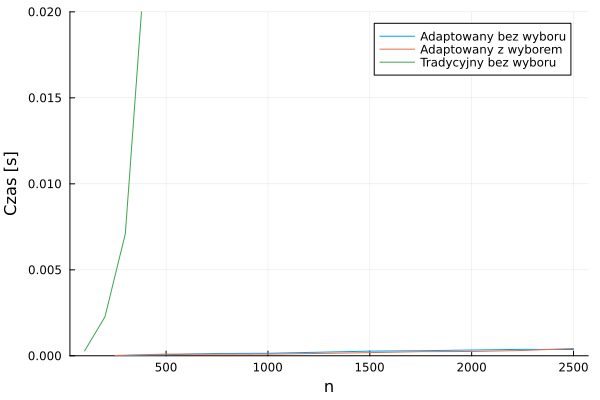

2500


"/home/dawiderter/Projects/Studies/scientific_computing/lista_5/raport/plots/adapted_comp_time.svg"

In [25]:
mat = read_matrix("./Dane/Dane10000_1_1/A.txt")
n_max_fast = 2500
n_max = 500
n_min_fast = 250
n_min = 100
rang = range(n_min, n_max, step=100)
k = 30
rang_full = range(n_min_fast, n_max_fast, step=250)

times = []
for n in rang
    println(n)
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed LU!(a,n)
        sum += t
    end
    push!(times, sum / k)
end

times_fast = []
for n in rang_full
    println(n)
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed adaptedLU!(a,n,5)
        sum += t
    end
    push!(times_fast, sum / k)
end

times_fast_p = []
for n in rang_full
    println(n)
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed adaptedPivotedLU!(a,n,5)
        sum += t
    end
    push!(times_fast_p, sum / k)
end

using Plots
plt = plot(rang_full, [times_fast times_fast_p], labels=["Adaptowany bez wyboru" "Adaptowany z wyborem"], ylabel="Czas [s]", xlabel="n")

plot!(plt, rang, times, labels="Tradycyjny bez wyboru")
ylims!(plt,0,0.02)
display(plt)
savefig(plt, "./raport/plots/adapted_comp_time.svg")

250
500


750


1000


1250


1500


1750


2000


2250


2500


250


500
750


1000


1250


1500


1750


2000


2250


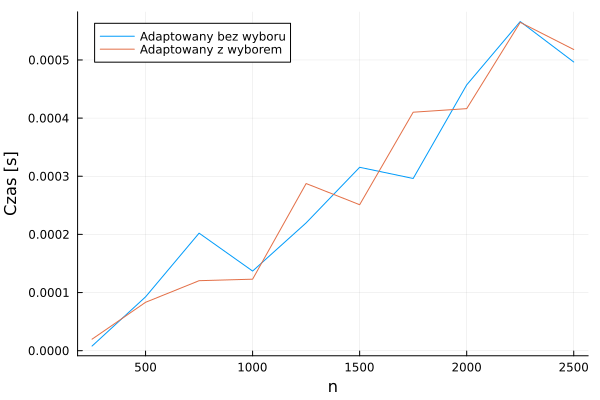

2500


"/home/dawiderter/Projects/Studies/scientific_computing/lista_5/raport/plots/just_adapted_comp_time.svg"

In [30]:
mat = read_matrix("./Dane/Dane10000_1_1/A.txt")
n_max_fast = 2500
n_min_fast = 250
k = 50
rang_full = range(n_min_fast, n_max_fast, step=250)

times_fast = []
for n in rang_full
    println(n)
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed adaptedLU!(a,n,5)
        sum += t
    end
    push!(times_fast, sum / k)
end

times_fast_p = []
for n in rang_full
    println(n)
    sum = 0
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        t = @elapsed adaptedPivotedLU!(a,n,5)
        sum += t
    end
    push!(times_fast_p, sum / k)
end

using Plots
plt = plot(rang_full, [times_fast times_fast_p], labels=["Adaptowany bez wyboru" "Adaptowany z wyborem"], ylabel="Czas [s]", xlabel="n")

display(plt)
savefig(plt, "./raport/plots/just_adapted_comp_time.svg")

250
500


750


1000


1250


1500


1750


2000


2250


2500


250


500


750


1000


1250


1500


1750


2000


2250


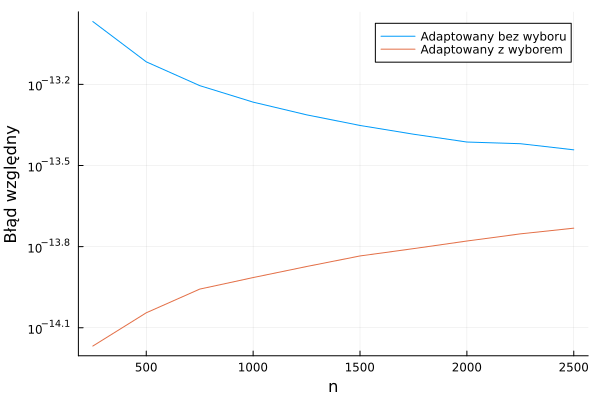

2500


"/home/dawiderter/Projects/Studies/scientific_computing/lista_5/raport/plots/just_adapted_comp_err.svg"

In [29]:
mat = read_matrix("./Dane/Dane10000_1_1/A.txt")
n_max_fast = 2500
n_min_fast = 250
k = 50
rang_full = range(n_min_fast, n_max_fast, step=250)

err_fast = []
for n in rang_full
    println(n)
    sum = 0
    x_true = ones(n)
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        b = a * x_true
        a = adaptedLU!(a,n,5)
        x = adaptedLUxb(a,n,5,b)
        sum += norm(x - x_true) / norm(x_true)
    end
    push!(err_fast, sum / k)
end

err_fast_p = []
for n in rang_full
    println(n)
    sum = 0
    x_true = ones(n)
    for _ in 1:k
        a = copy(mat[1:n,1:n])
        b = a * x_true
        a,p = adaptedPivotedLU!(a,n,5)
        x = adaptedPivotedLUxb(a,n,5,b,p)
        sum += norm(x - x_true)
    end
    push!(err_fast_p, sum / k)
end

using Plots
plt = plot(rang_full, [err_fast err_fast_p], labels=["Adaptowany bez wyboru" "Adaptowany z wyborem"], ylabel="Błąd względny", xlabel="n", yscale=:log10)

display(plt)
savefig(plt, "./raport/plots/just_adapted_comp_err.svg")

In [63]:
using LinearAlgebra
dane = ["./Dane/Dane16_1_1", "./Dane/Dane10000_1_1", "./Dane/Dane50000_1_1", "./Dane/Dane100000_1_1", "./Dane/Dane300000_1_1", "./Dane/Dane500000_1_1"]

err = []
time = []

for dana in dane 
    a_path = "$(dana)/A.txt"
    b_path = "$(dana)/b.txt"
    println(dana)
    a = @time read_adapted_matrix(a_path)
    b = read_vector(b_path)
    n = a.n
    l = a.l
    t1 = @elapsed a = adaptedLU!(a,n,l)
    t2 = @elapsed x = adaptedLUxb(a,n,l,b)
    push!(err, norm(x - ones(n)))
    push!(time, t1 + t2)
end

println(err)
println(time)

./Dane/Dane16_1_1
  0.000082 seconds (369 allocations: 30.875 KiB)
./Dane/Dane10000_1_1


  0.036233 seconds (280.04 k allocations: 23.351 MiB)
./Dane/Dane50000_1_1


  0.196766 seconds (1.20 M allocations: 100.088 MiB, 10.94% gc time)
./Dane/Dane100000_1_1


  0.412077 seconds (2.80 M allocations: 233.926 MiB, 6.43% gc time)
./Dane/Dane300000_1_1


  1.058914 seconds (7.20 M allocations: 607.575 MiB, 6.52% gc time)


./Dane/Dane500000_1_1


  1.722031 seconds (12.00 M allocations: 1014.962 MiB, 6.80% gc time)


Any[3.966527160699561e-14, 5.8733231869621614e-12, 2.50654513117262e-11, 1.8792357134259906e-11, 2.1503279743215347e-10, 8.592516851986558e-11]
Any[6.624e-6, 0.002571904, 0.009549631999999999, 0.025548834, 0.086766499, 0.093758582]


In [62]:
using LinearAlgebra
dane = ["./Dane/Dane16_1_1", "./Dane/Dane10000_1_1", "./Dane/Dane50000_1_1", "./Dane/Dane100000_1_1", "./Dane/Dane300000_1_1", "./Dane/Dane500000_1_1"]

err_p = []
time_p = []

for dana in dane 
    a_path = "$(dana)/A.txt"
    b_path = "$(dana)/b.txt"
    println(dana)
    a = @time read_adapted_matrix(a_path)
    b = read_vector(b_path)
    n = a.n
    l = a.l
    t1 = @elapsed a,p = adaptedPivotedLU!(a,n,l)
    t2 = @elapsed x = adaptedPivotedLUxb(a,n,l,b,p)
    push!(err_p, norm(x - ones(n)))
    push!(time_p, t1 + t2)
end

println(err_p)
println(time_p)

./Dane/Dane16_1_1
  0.000168 seconds (369 allocations: 30.875 KiB)
./Dane/Dane10000_1_1


  0.032195 seconds (280.04 k allocations: 23.351 MiB)
./Dane/Dane50000_1_1


  0.186455 seconds (1.20 M allocations: 100.088 MiB, 10.29% gc time)
./Dane/Dane100000_1_1


  0.394474 seconds (2.80 M allocations: 233.926 MiB, 5.26% gc time)
./Dane/Dane300000_1_1


  1.038182 seconds (7.20 M allocations: 607.575 MiB, 7.24% gc time)


./Dane/Dane500000_1_1


  1.879201 seconds (12.00 M allocations: 1014.962 MiB, 7.47% gc time)


Any[1.942097114741681e-15, 3.6449316838000965e-14, 9.243378469493202e-14, 9.949766468700559e-14, 2.2437104672827104e-13, 2.8829287643015405e-13]
Any[2.9404e-5, 0.004481206, 0.019294269000000003, 0.047754194, 0.155748744, 0.16779999699999998]


In [1]:
n = [16, 10000, 50000, 100000, 300000, 500000]
l = [4 , 5    , 4    , 5     , 4     , 4]
cases = 6

using Printf
fix_e(x, dig = 4) = replace(string(round(x, sigdigits = dig)), r"e\+00" => "", r"e(-\d+)" => s" dot 10^(\1)", r"e\+?(\d+)" => s" dot 10^(\1)")

print("\$n,l\$,")
for i in 1:cases
    print("\$$(n[i]),$(l[i])\$,")
end
println()
print("[Bez wyboru],")
for i in 1:cases
    t = fix_e(time[i])
    print("\$$t s\$,")
end
println()
print("[Z wyborem],")
for i in 1:cases
    t = fix_e(time_p[i])
    print("\$$t s\$,")
end
println()

$n,l$,$16,4$,$10000,5$,$50000,4$,$100000,5$,$300000,4$,$500000,4$,
[Bez wyboru],

MethodError: MethodError: no method matching getindex(::typeof(time), ::Int64)

In [2]:
n = [16, 10000, 50000, 100000, 300000, 500000]
l = [4 , 5    , 4    , 5     , 4     , 4]
cases = 6

using Printf
fix_e(x, dig = 2) = replace(string(round(x, sigdigits = dig)), r"e\+00" => "", r"e(-\d+)" => s" dot 10^(\1)", r"e\+?(\d+)" => s" dot 10^(\1)")

print("\$n,l\$,")
for i in 1:cases
    print("\$$(n[i]),$(l[i])\$,")
end
println()
print("[Bez wyboru],")
for i in 1:cases
    t = fix_e(err[i])
    print("\$$t\$,")
end
println()
print("[Z wyborem],")
for i in 1:cases
    t = fix_e(err_p[i])
    print("\$$t\$,")
end
println()

$n,l$,$16,4$,$10000,5$,$50000,4$,$100000,5$,$300000,4$,$500000,4$,
[Bez wyboru],

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)

In [5]:
using Plots
plot(n, [tim time_p])

ArgumentError: ArgumentError: Package Plots not found in current path.
- Run `import Pkg; Pkg.add("Plots")` to install the Plots package.